<a href="https://colab.research.google.com/github/mj291001/Challenge-Telecom-X-Parte2/blob/main/Challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report


##Archivo previamente tratado

In [2]:
url = 'https://raw.githubusercontent.com/mj291001/Challenge-Telecom-X-Parte2/refs/heads/main/datos_TelecomX.csv'
clientes= pd.read_csv(url)
clientes

,ID,Evasión,Genero,Jubilado,Pareja,Dependientes,Meses_contrato,Teléfono,Multilineas_telefono,Internet,...,Proteccion_dispositivo,Soporte_tecnico,TV,Películas,Tipo_contrato,Facturación_online,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7039,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7043 non-null   object 
 1   Evasión                 7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Jubilado                7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Meses_contrato          7043 non-null   int64  
 7   Teléfono                7043 non-null   int64  
 8   Multilineas_telefono    7043 non-null   object 
 9   Internet                7043 non-null   object 
 10  Seguridad_online        7043 non-null   object 
 11  Respaldo_online         7043 non-null   object 
 12  Proteccion_dispositivo  7043 non-null   object 
 13  Soporte_tecnico         7043 non-null   object 
 14  TV                      7043 non-null   

##Eliminación de columnas irrelevantes

In [4]:
clientes_filtrados= clientes.drop('ID', axis=1)
clientes_filtrados

,Evasión,Genero,Jubilado,Pareja,Dependientes,Meses_contrato,Teléfono,Multilineas_telefono,Internet,Seguridad_online,...,Proteccion_dispositivo,Soporte_tecnico,TV,Películas,Tipo_contrato,Facturación_online,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Masculino,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Masculino,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Femenino,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Femenino,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7039,1,Masculino,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,0,Masculino,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,0,Masculino,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


##Encoding

In [5]:
clientes_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evasión                 7043 non-null   int64  
 1   Genero                  7043 non-null   object 
 2   Jubilado                7043 non-null   int64  
 3   Pareja                  7043 non-null   int64  
 4   Dependientes            7043 non-null   int64  
 5   Meses_contrato          7043 non-null   int64  
 6   Teléfono                7043 non-null   int64  
 7   Multilineas_telefono    7043 non-null   object 
 8   Internet                7043 non-null   object 
 9   Seguridad_online        7043 non-null   object 
 10  Respaldo_online         7043 non-null   object 
 11  Proteccion_dispositivo  7043 non-null   object 
 12  Soporte_tecnico         7043 non-null   object 
 13  TV                      7043 non-null   object 
 14  Películas               7043 non-null   

In [6]:
clientes_filtrados.columns

Index(['Evasión', 'Genero', 'Jubilado', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Teléfono', 'Multilineas_telefono', 'Internet',
       'Seguridad_online', 'Respaldo_online', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV', 'Películas', 'Tipo_contrato',
       'Facturación_online', 'Metodo_pago', 'Cargos_mensuales',
       'Cargos_totales', 'Cuentas_Diarias'],
      dtype='object')

In [7]:
variables_categoricas = ['Genero','Multilineas_telefono', 'Internet',
       'Seguridad_online', 'Respaldo_online', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV', 'Películas', 'Tipo_contrato','Metodo_pago']
variables_numericas = ['Meses_contrato','Cargos_mensuales',
       'Cargos_totales', 'Cuentas_Diarias']
clientes_modificado=pd.get_dummies(data=clientes_filtrados, columns=variables_categoricas, dtype=int)
clientes_modificado

,Evasión,Jubilado,Pareja,Dependientes,Meses_contrato,Teléfono,Facturación_online,Cargos_mensuales,Cargos_totales,Cuentas_Diarias,...,Películas_0,Películas_1,Películas_No internet service,Tipo_contrato_Month-to-month,Tipo_contrato_One year,Tipo_contrato_Two year,Metodo_pago_Bank transfer (automatic),Metodo_pago_Credit card (automatic),Metodo_pago_Electronic check,Metodo_pago_Mailed check
0,0,0,1,1,9,1,1,65.60,593.30,2.186667,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.90,542.40,1.996667,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.90,280.85,2.463333,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.00,1237.85,3.266667,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.90,267.40,2.796667,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,55.15,742.90,1.838333,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,0,22,1,1,85.10,1873.70,2.836667,...,0,1,0,1,0,0,0,0,1,0
7040,0,0,0,0,2,1,1,50.30,92.75,1.676667,...,1,0,0,1,0,0,0,0,0,1
7041,0,0,1,1,67,1,0,67.85,4627.65,2.261667,...,0,1,0,0,0,1,0,0,0,1


##Verificación dela proporción de evasión(cancelación)

In [8]:
print(clientes_modificado['Evasión'].value_counts(normalize=True))


Evasión
0    0.73463
1    0.26537
Name: proportion, dtype: float64


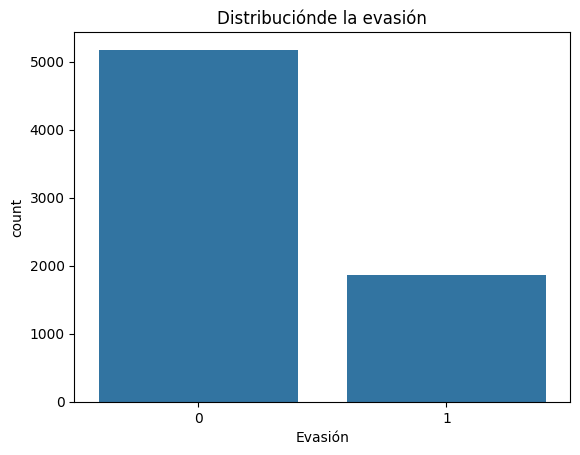

In [9]:
sns.countplot(x='Evasión', data=clientes_modificado)
plt.title('Distribuciónde la evasión')
plt.show()

##Balanceo de clases

In [10]:
X = clientes_modificado.drop(columns=["Evasión"])
y = clientes_modificado["Evasión"]


In [11]:
undersampler = RandomUnderSampler(random_state=42)
X_balanceado, y_balanceado = undersampler.fit_resample(X, y)


In [12]:
print("Distribución después de undersampler:")
y_balanceado.value_counts(normalize=True)

Distribución después de undersampler:


,proportion
Evasión,
0,0.5
1,0.5


##Normalización o Estandarización

In [13]:
preproceso = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), variables_numericas),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), variables_categoricas)],
    remainder="passthrough")

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preproceso),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))])

#Correlación y Selección de Variables

##Análisis de Correlación

In [14]:
correlacion_col = ['Meses_contrato','Cargos_mensuales',
       'Cargos_totales', 'Cuentas_Diarias','Evasión']

correlacion = clientes_modificado[correlacion_col].corr()

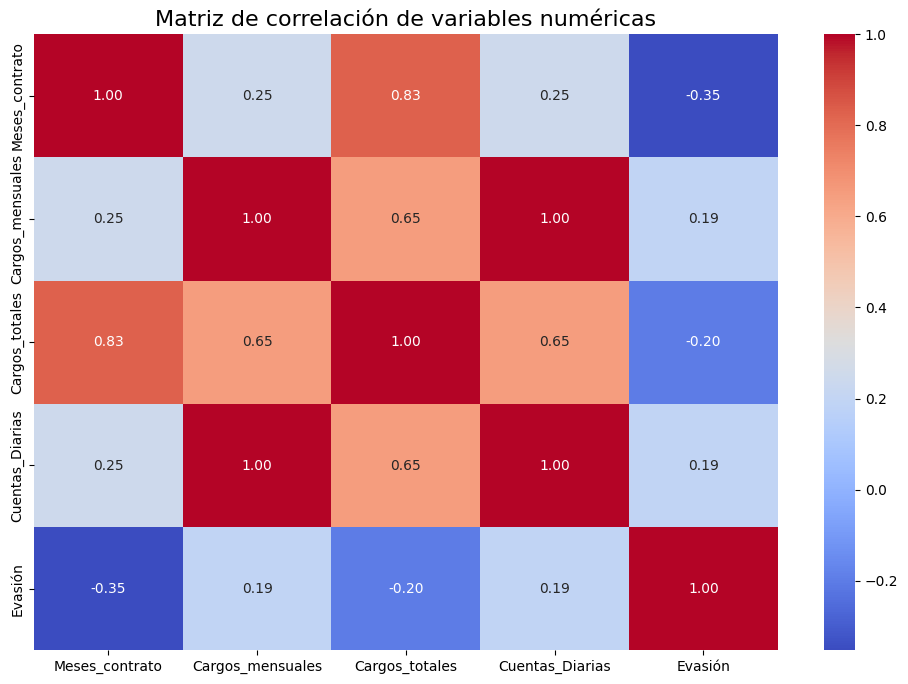

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de variables numéricas", fontsize=16)
plt.show()

##Análisis dirigido

###Evasión x cargos totales

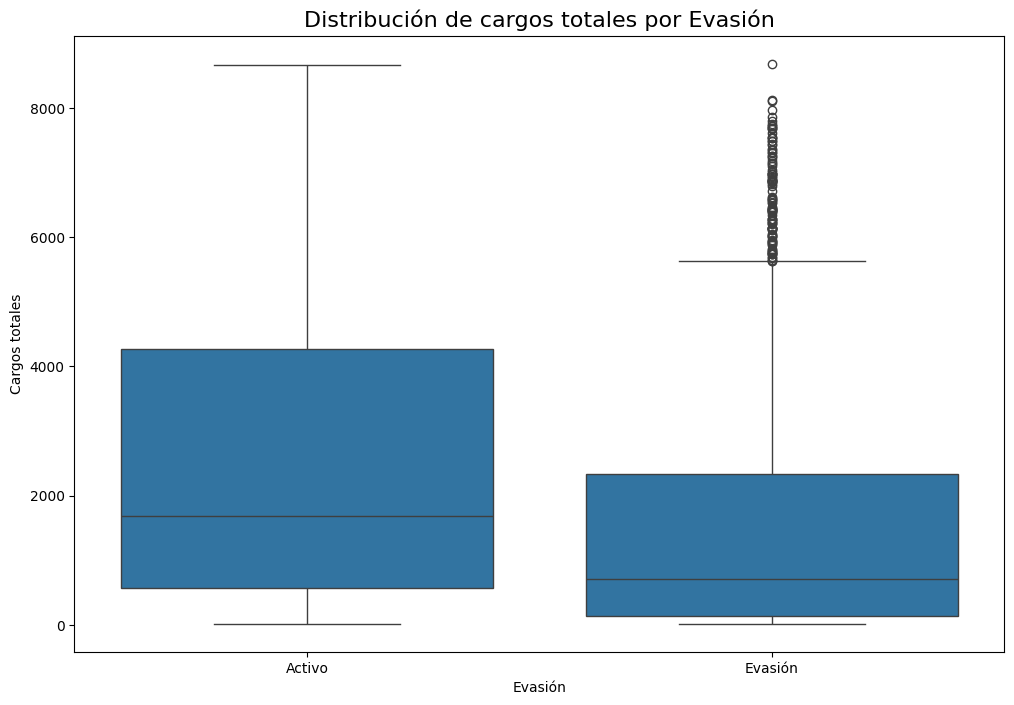

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Evasión', y='Cargos_totales', data=clientes_modificado)
plt.xticks([0,1], ["Activo", "Evasión"])
plt.title("Distribución de cargos totales por Evasión", fontsize=16)
plt.ylabel("Cargos totales")
plt.show()

###Evasión x meses de contrato

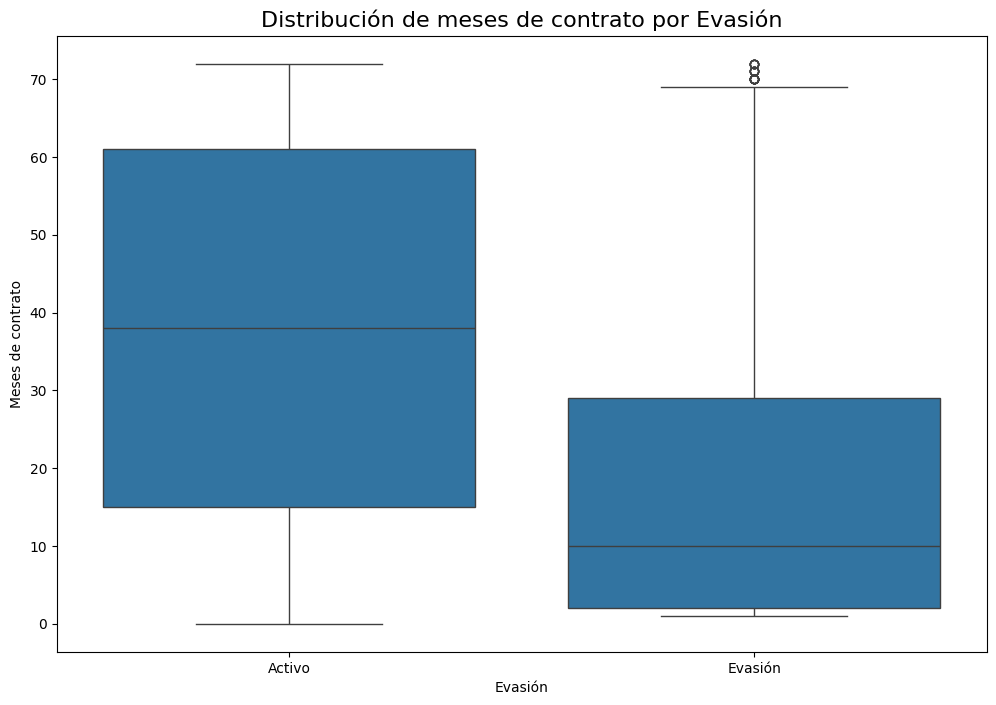

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Evasión', y='Meses_contrato', data=clientes_modificado)
plt.xticks([0,1], ["Activo", "Evasión"])
plt.title("Distribución de meses de contrato por Evasión", fontsize=16)
plt.ylabel("Meses de contrato")
plt.show()

### Cargos totales vs cuentas diarias

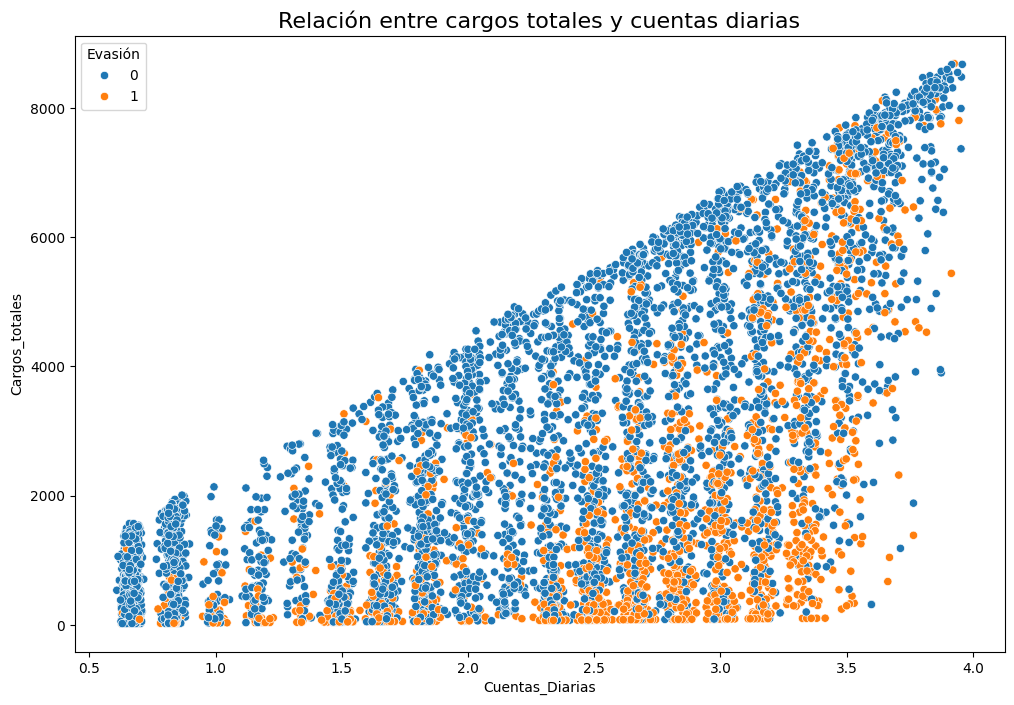

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cuentas_Diarias', y='Cargos_totales', hue='Evasión', data=clientes_modificado)
plt.title("Relación entre cargos totales y cuentas diarias", fontsize=16)
plt.show()

#Modelado predictivo

##Separación de datos

In [19]:
X = clientes_modificado.drop("Evasión", axis=1)
y = clientes_modificado["Evasión"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (4930, 42)
Tamaño de prueba: (2113, 42)


## Creación de modelos

### Regresión logística

In [20]:
log_reg_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])


log_reg_pipeline.fit(X_train, y_train)


y_pred_log = log_reg_pipeline.predict(X_test)


print("=== Regresión Logística===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== Regresión Logística===
[[1382  170]
 [ 256  305]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



###Random Forest

In [21]:
rf_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight="balanced"
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[1389  163]
 [ 284  277]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



##Evaluación de los modelos

In [22]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"=== {nombre} ===")
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("\nReporte completo:\n", classification_report(y_true, y_pred))
    print("-------------------------------------------------\n")

### Regresión logística

In [23]:
y_pred_log = log_reg_pipeline.predict(X_test)

evaluar_modelo(y_test, y_pred_log, "Regresión Logística")

=== Regresión Logística ===
Exactitud (Accuracy): 0.7983909133932797
Precisión: 0.6421052631578947
Recall: 0.5436720142602496
F1-score: 0.5888030888030888
Matriz de Confusión:
 [[1382  170]
 [ 256  305]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

-------------------------------------------------



### Random Forest

In [24]:
y_pred_rf = rf_pipeline.predict(X_test)

evaluar_modelo(y_test, y_pred_rf, "Random Forest")

=== Random Forest ===
Exactitud (Accuracy): 0.7884524372929484
Precisión: 0.6295454545454545
Recall: 0.49376114081996436
F1-score: 0.5534465534465535
Matriz de Confusión:
 [[1389  163]
 [ 284  277]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

-------------------------------------------------



###Mejoras

In [25]:
log_reg_pipeline_mejora= Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000,C=10, random_state=42))
])


log_reg_pipeline_mejora.fit(X_train, y_train)


y_pred_log_mejor = log_reg_pipeline_mejora.predict(X_test)


print("=== Regresión Logística con C===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Regresión Logística con C===
[[1382  170]
 [ 256  305]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [26]:
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

rf_pipeline_resampled = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42,
        class_weight="balanced"
    ))
])


rf_pipeline_resampled.fit(X_train_res, y_train_res)


y_pred_rf_res = rf_pipeline_resampled.predict(X_test)


print("=== Random Forest Mejorado con SMOTE ===")
print(confusion_matrix(y_test, y_pred_rf_res))
print(classification_report(y_test, y_pred_rf_res))


=== Random Forest Mejorado con SMOTE ===
[[1355  197]
 [ 274  287]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.59      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [27]:
y_pred_log = log_reg_pipeline_mejora.predict(X_test)
y_pred_rf_res = rf_pipeline_resampled.predict(X_test)

evaluar_modelo(y_test, y_pred_log_mejor, "Regresión Logística Mejorada con C")
evaluar_modelo(y_test, y_pred_rf_res, "Random Forest Mejorado con SMOTE")

=== Regresión Logística Mejorada con C ===
Exactitud (Accuracy): 0.7974443918599148
Precisión: 0.6388308977035491
Recall: 0.5454545454545454
F1-score: 0.5884615384615385
Matriz de Confusión:
 [[1379  173]
 [ 255  306]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

-------------------------------------------------

=== Random Forest Mejorado con SMOTE ===
Exactitud (Accuracy): 0.7770941788925698
Precisión: 0.5929752066115702
Recall: 0.5115864527629234
F1-score: 0.5492822966507177
Matriz de Confusión:
 [[1355  197]
 [ 274  287]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.59      0.51    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


La exactitud en ambos modelos es muy similar, pero se observa un mejor desempeño en la Regresión logística sobretodo en su recall y F1, pero aun así se observa un leve underfiting en el recall, para poder mejorar esto se aplica Smote para el modelo Forest Random, pero se vio afectada la precisión, en cambio para Regresión Líneal sólo se le asigno un valor a C y de esta manera el recall aumento ligeramente sin afectar lo demás.

#Interpretación y conclusiones

##Análisis de la importancia de las variables

### Regresión lineal: Coeficientes de las variables
Positivo: Aumenta probabilidad de evasión

Negativo: Disminuye probabilidad de evasión


In [28]:
columnas = X_train.columns

coeficientes = log_reg_pipeline.named_steps["model"].coef_[0]

df_coef = pd.DataFrame({
    "Variable": columnas,
    "Coeficiente": coeficientes,
    "Abs_Coef": np.abs(coeficientes)
}).sort_values(by="Abs_Coef", ascending=False)

print("=== Importancia de variables - Regresión Logística ===")
print(df_coef)


=== Importancia de variables - Regresión Logística ===
                                      Variable  Coeficiente  Abs_Coef
3                               Meses_contrato    -1.430754  1.430754
7                               Cargos_totales     0.680114  0.680114
6                             Cargos_mensuales    -0.354297  0.354297
8                              Cuentas_Diarias    -0.354297  0.354297
16                        Internet_Fiber optic     0.352619  0.352619
37                      Tipo_contrato_Two year    -0.308986  0.308986
35                Tipo_contrato_Month-to-month     0.308305  0.308305
15                                Internet_DSL    -0.285872  0.285872
5                           Facturación_online     0.202313  0.202313
30                                        TV_1     0.145350  0.145350
33                                 Películas_1     0.135396  0.135396
40                Metodo_pago_Electronic check     0.128505  0.128505
26                           Soport

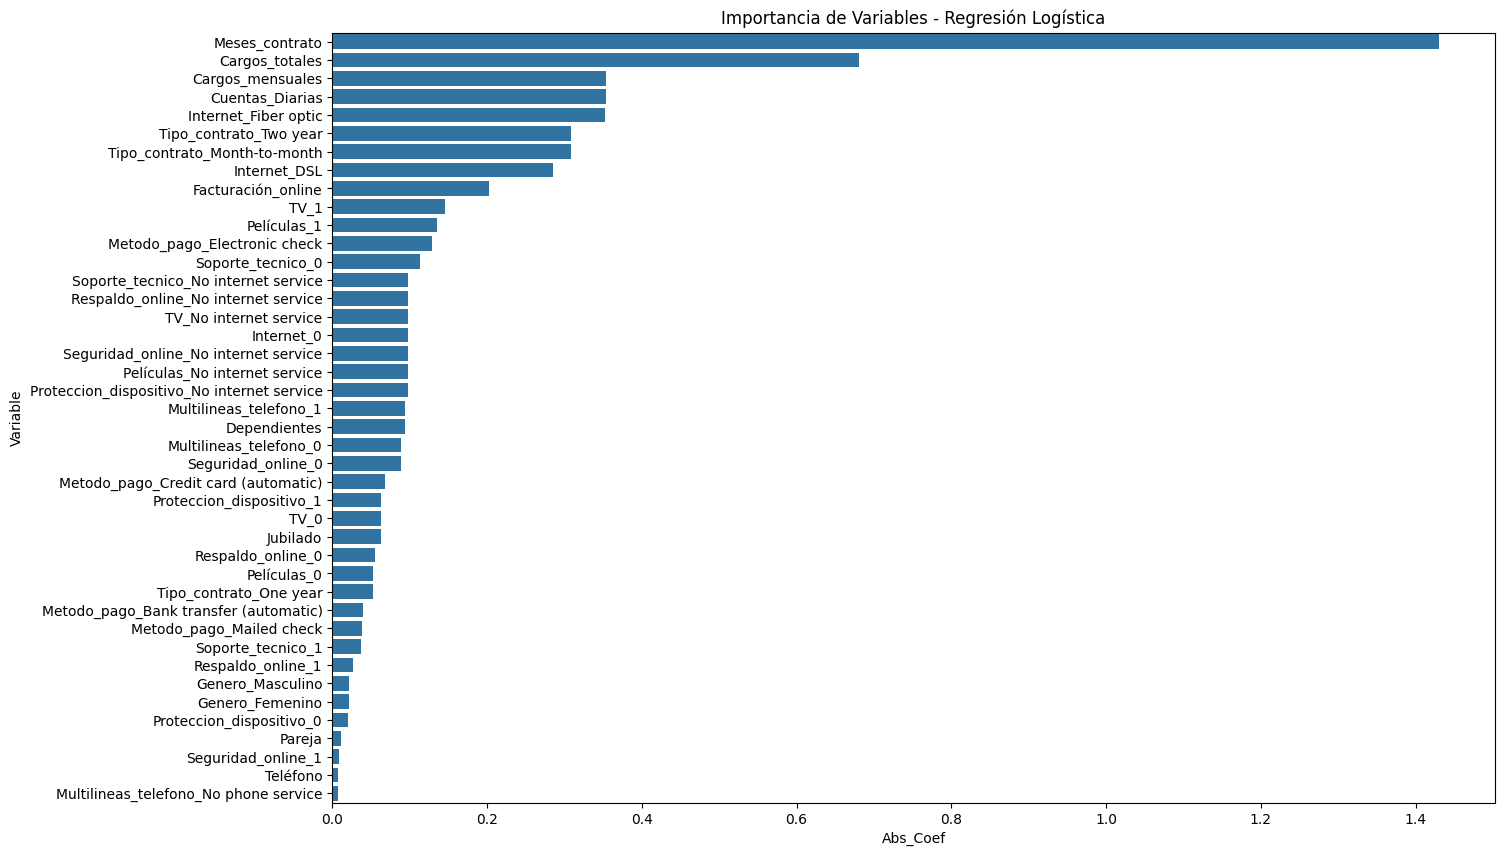

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x="Abs_Coef", y="Variable", data=df_coef)
plt.title("Importancia de Variables - Regresión Logística")
plt.show()

## Random Forest: Importancia de las variables
Cuánto cada variable reduce la impureza en las divisiones de los árboles

In [30]:
importancias = rf_pipeline_resampled.named_steps['model'].feature_importances_

df_importancia_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print("=== Importancia de variables - Random Forest ===")
print(df_importancia_rf)

=== Importancia de variables - Random Forest ===
                                      Variable  Importancia
35                Tipo_contrato_Month-to-month     0.097460
7                               Cargos_totales     0.090937
3                               Meses_contrato     0.086438
40                Metodo_pago_Electronic check     0.068346
6                             Cargos_mensuales     0.065997
8                              Cuentas_Diarias     0.065384
26                           Soporte_tecnico_0     0.054958
17                          Seguridad_online_0     0.052023
20                           Respaldo_online_0     0.032895
5                           Facturación_online     0.031451
1                                       Pareja     0.025907
23                    Proteccion_dispositivo_0     0.024518
37                      Tipo_contrato_Two year     0.024173
2                                 Dependientes     0.022424
36                      Tipo_contrato_One year     

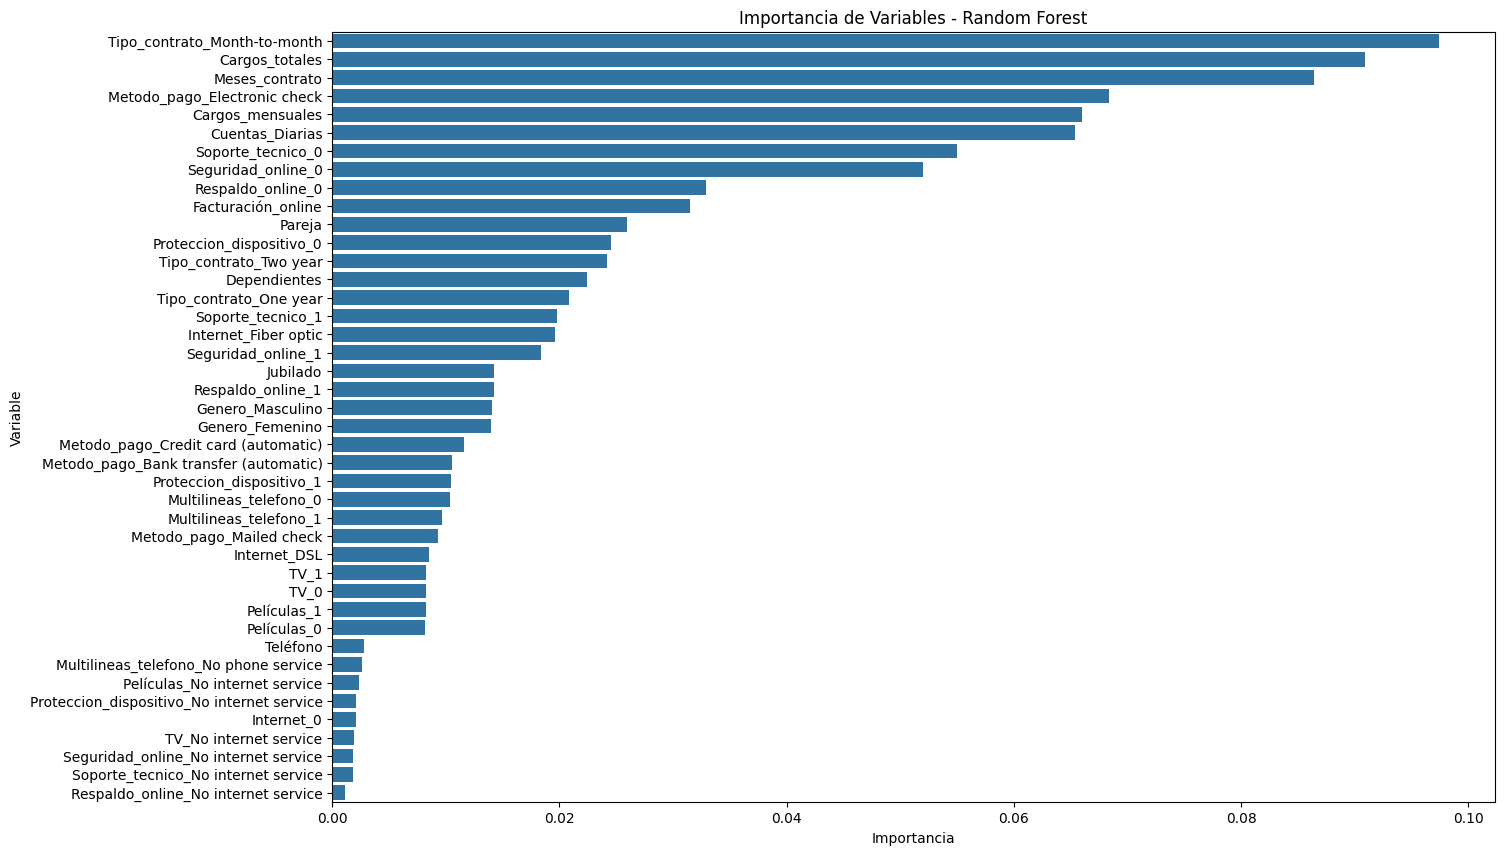

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x="Importancia", y="Variable", data=df_importancia_rf)
plt.title("Importancia de Variables - Random Forest")
plt.show()

###Comparativa

In [32]:
top_log = df_coef.head(10)[["Variable", "Coeficiente", "Abs_Coef"]]

top_rf = df_importancia_rf.head(10)[["Variable", "Importancia"]]

print("=== Top 10 variables - Regresión Logística ===")
print(top_log)

print("\n=== Top 10 variables - Random Forest ===")
print(top_rf)

=== Top 10 variables - Regresión Logística ===
                        Variable  Coeficiente  Abs_Coef
3                 Meses_contrato    -1.430754  1.430754
7                 Cargos_totales     0.680114  0.680114
6               Cargos_mensuales    -0.354297  0.354297
8                Cuentas_Diarias    -0.354297  0.354297
16          Internet_Fiber optic     0.352619  0.352619
37        Tipo_contrato_Two year    -0.308986  0.308986
35  Tipo_contrato_Month-to-month     0.308305  0.308305
15                  Internet_DSL    -0.285872  0.285872
5             Facturación_online     0.202313  0.202313
30                          TV_1     0.145350  0.145350

=== Top 10 variables - Random Forest ===
                        Variable  Importancia
35  Tipo_contrato_Month-to-month     0.097460
7                 Cargos_totales     0.090937
3                 Meses_contrato     0.086438
40  Metodo_pago_Electronic check     0.068346
6               Cargos_mensuales     0.065997
8                Cu

In [33]:
comunes = set(top_log["Variable"]).intersection(set(top_rf["Variable"]))
print("\nVariables comunes entre los dos modelos:", comunes)

solo_log = set(top_log["Variable"]) - comunes
solo_rf = set(top_rf["Variable"]) - comunes

print("Variables importantes solo en Regresión Logística:", solo_log)
print("Variables importantes solo en Random Forest:", solo_rf)



Variables comunes entre los dos modelos: {'Cargos_mensuales', 'Cuentas_Diarias', 'Facturación_online', 'Meses_contrato', 'Cargos_totales', 'Tipo_contrato_Month-to-month'}
Variables importantes solo en Regresión Logística: {'Internet_DSL', 'Internet_Fiber optic', 'TV_1', 'Tipo_contrato_Two year'}
Variables importantes solo en Random Forest: {'Respaldo_online_0', 'Metodo_pago_Electronic check', 'Seguridad_online_0', 'Soporte_tecnico_0'}


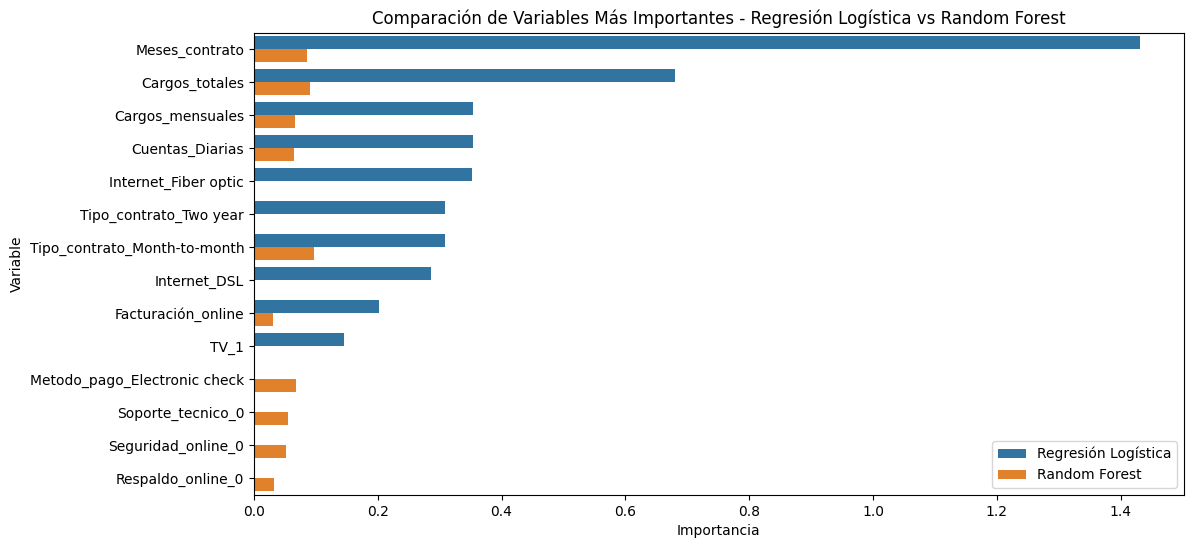

In [34]:
top_log = df_coef.head(10)[["Variable", "Abs_Coef"]].rename(columns={"Abs_Coef":"Importancia"})
top_log["Modelo"] = "Regresión Logística"

top_rf = df_importancia_rf.head(10)[["Variable", "Importancia"]].copy()
top_rf["Modelo"] = "Random Forest"

top_comparacion = pd.concat([top_log, top_rf], axis=0)

plt.figure(figsize=(12,6))
sns.barplot(x="Importancia", y="Variable", hue="Modelo", data=top_comparacion)
plt.title("Comparación de Variables Más Importantes - Regresión Logística vs Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.legend()
plt.show()



#Conclusiones

Después del análisis de los modelos "Regresión Logística" y "Random Forest", elegidos para el apoyo en la predicción de qué clientes podrían cancelar su contrato se llegaron a las siguientes conclusiones.

La regresión logística permitió observar el efecto de cada variable sobre la probabilidad de evasión y el random forest apoyó en la definición de más variables por las relaciones no lineales que el primer modelo no considera.

Las variables que coinciden para ambos modelos resultaron ser: meses que se llevan de contrato, cargos totales, cargos mensuales, cuentas diarias, tipo de contrato mes a mes y facturación online, considerandose de esta manera claves para el riesgo de cancelación. Además con los coeficientes generados por el primer modelo se concluye que a mayor duración de contrato la probabilidad de evasión es menor, lo mismo pasa con los cargos mensuales y cuentas diarias, y por el contrario para cargos totales, cuanto mmás alto es el cargo total la probabilidad de cancelar tamién aumenta, algo parecido con lo que pasa con tipo de contrato mes a mes y facturacion online, en estos casos si el cliente cuanta con estos servicios también la probabilidad de que cancele es más alta.

Con lo anterior se pueden establecer estrategias para disminuir la probabilidad de cancelación, como el ofrecer beneficios para los clientes con contratos de años y no meses, ofrecer descuentos cuando los cargos totales sean mayores, mejorar el soporte técnico, recordatorios de pago y revisar periodicamente las métricas para detectar clientes en riesgo.